# CS 4661: Introduction to Data Science
## Jay Tandel


### Question: Deep Convolutional Autoencoder For Image Denoising
In this problem, we use a very interesting and effective application of deep learning, specifically
Deep Convolutional Autoencoder. We implement an unsupervised deep convolutional
autoencoder for image de-noising, converting noisy digits images from the MNIST dataset to clear
digits images. (Make sure to review the Lab5 tutorial on CNN (in Canvas) before starting this HW).

## A
Import all of the libraries and tools that you need including the following layers for your
network:
###### from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose

In [185]:
# Importing the required packages and libraries
import pandas as pd
import numpy as np
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose
from keras.models import Sequential, Input
from tensorflow.keras.models import Model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


## B
Import the mnist dataset and split it into testing and training:

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

REMEMBER: In this problem we use Unsupervised Autoencoder, so you don’t use y_train and
y_test.

In [186]:
# Keras will MNIST dataset for us:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [187]:
X_train.shape

(60000, 28, 28)

In [188]:
X_test.shape

(10000, 28, 28)

## C
Use the following function to add Random noise to all your training and testing samples, and
save them as new datasets noisy_X_train and noisy_X_test.

def noise(array):

noise_factor = 0.4

noisy_array = array + noise_factor * np.random.normal(

loc=0.0, scale=1.0, size=array.shape)

return np.clip(noisy_array, 0.0, 1.0)

In [189]:
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
                    loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

In [190]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))


In [191]:
noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

In [192]:
noisy_X_train.shape

(60000, 28, 28, 1)

In [193]:
noisy_X_test.shape

(10000, 28, 28, 1)

## D
Plot some of your samples with noise and without noise and compare them. You should see
something like this:

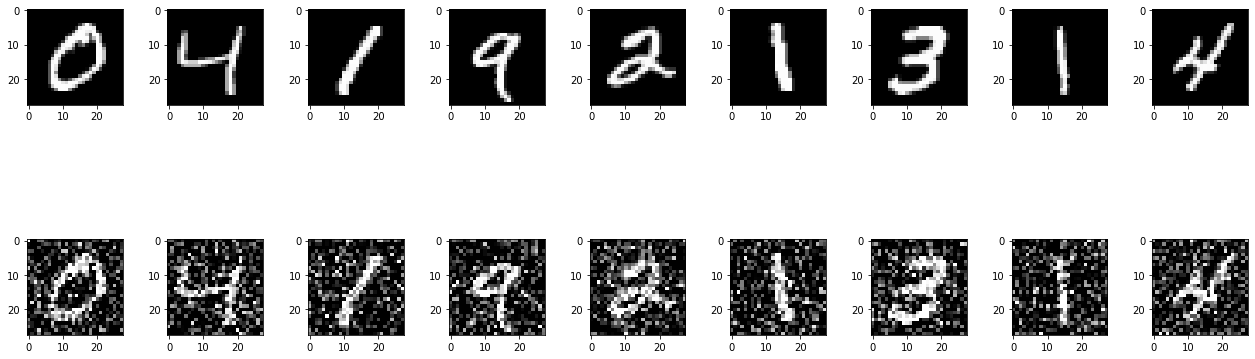

In [194]:
%matplotlib inline

plt.figure(figsize=(50, 6))
for i in range(1,10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")

    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(noisy_X_train[i].reshape(28, 28), cmap="gray")

plt.show()

## E
Now, we want to create our deep convolutional autoencoder for de-noising the images. As
you saw in class lectures, the autoencoder includes an Encoder part that compresses the
input, and a Decoder part that reconstruct the data.
Add the following layers in order:

#### Encoder:
Convolution2D(32, (3, 3), activation="relu", padding="same")

MaxPooling2D((2, 2), padding="same")

Convolution2D(32, (3, 3), activation="relu", padding="same")

MaxPooling2D((2, 2), padding="same")

#### Decoder:
Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")

Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")

Convolution2D(1, (3, 3), activation="sigmoid", padding="same")

Note: Notice the Conv2DTranspose layer, which is called Transposed convolution also known
as Deconvolution. Don’t forget the “strides=2” (the step size of 2). Also, notice the last
Convolution2D layer that is used to convert the tensor to the same size as we had in the input.

In [195]:
#input_img = Input(shape=(28,28,1))

In [196]:
#define the model
model = Sequential()

#encoder
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same", input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

#decoder
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Convolution2D(1, (3, 3), activation="sigmoid", padding="same"))

## F
Compile the model with loss='binary_crossentropy', optimizer='adam'

In [197]:
# Compile the autoencoder
model.compile(loss='binary_crossentropy', optimizer='adam') 


In [198]:
#model.summary()

## G
Train the model ONLY using the training data. Remember, you don’t use y (label) here. Your
input will be noisy_X_train and your output will be X_train (reconstruction). Use the
batch_size=128 and epochs=5:

fit(noisy_X_train, X_train, batch_size=128, epochs=5)

In [199]:
# Train the autoencoder
history = model.fit(noisy_X_train, X_train, 
                epochs = 5, 
                batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2856
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1015
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0964
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0941
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0926


## H
Now, Make prediction on your noisy testing set to de-noise it. The output of your prediction
will be the de-noised version of your noisy testing set:
predict(noisy_X_test)

In [200]:
predictions = model.predict(noisy_X_test)

## I
It is time to see the Magic! Plot 10 random images of your testing set before and after denoising
to see how amazing your model is in cleaning noisy images. You should see something
like this:

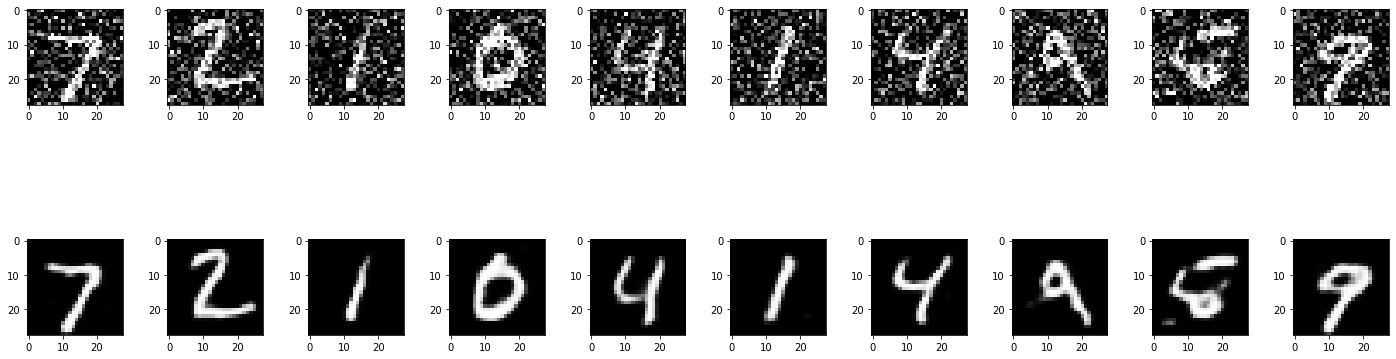

In [201]:
plt.figure(figsize=(50, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(noisy_X_test[i].reshape(28, 28), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()